In [25]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame 
import nltk

from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from scipy.spatial.distance import cosine
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

import re
import string
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import mean_squared_error

In [3]:
music_df = pd.read_json("data/reviews_Digital_Music_5.json", lines=True)

In [4]:
music_df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,5555991584,"[3, 3]",5,"It's hard to believe ""Memory of Trees"" came ou...","09 12, 2006",A3EBHHCZO6V2A4,"Amaranth ""music fan""",Enya's last great album,1158019200
1,5555991584,"[0, 0]",5,"A clasically-styled and introverted album, Mem...","06 3, 2001",AZPWAXJG9OJXV,bethtexas,Enya at her most elegant,991526400
2,5555991584,"[2, 2]",5,I never thought Enya would reach the sublime h...,"07 14, 2003",A38IRL0X2T4DPF,bob turnley,The best so far,1058140800
3,5555991584,"[1, 1]",5,This is the third review of an irish album I w...,"05 3, 2000",A22IK3I6U76GX0,Calle,Ireland produces good music.,957312000
4,5555991584,"[1, 1]",4,"Enya, despite being a successful recording art...","01 17, 2008",A1AISPOIIHTHXX,"Cloud ""...""",4.5; music to dream to,1200528000


In [8]:
cols = ['reviewerID', 'asin', 'overall', 'unixReviewTime']
dataset_songs = pd.read_csv("data/ratings_Digital_Music.csv", names=cols)
dataset_songs.head()

,reviewerID,asin,overall,unixReviewTime
0,A2EFCYXHNK06IS,5555991584,5.0,978480000
1,A1WR23ER5HMAA9,5555991584,5.0,953424000
2,A2IR4Q0GPAFJKW,5555991584,4.0,1393545600
3,A2V0KUVAB9HSYO,5555991584,4.0,966124800
4,A1J0GL9HCA7ELW,5555991584,5.0,1007683200


In [9]:
count = music_df.groupby("asin", as_index=False).count()
mean = music_df.groupby("asin", as_index=False).mean()

dfMerged = pd.merge(music_df, count, how='right', on=['asin'])
dfMerged.head()

,asin,helpful_x,overall_x,reviewText_x,reviewTime_x,reviewerID_x,reviewerName_x,summary_x,unixReviewTime_x,helpful_y,overall_y,reviewText_y,reviewTime_y,reviewerID_y,reviewerName_y,summary_y,unixReviewTime_y
0,5555991584,"[3, 3]",5,"It's hard to believe ""Memory of Trees"" came ou...","09 12, 2006",A3EBHHCZO6V2A4,"Amaranth ""music fan""",Enya's last great album,1158019200,23,23,23,23,23,23,23,23
1,5555991584,"[0, 0]",5,"A clasically-styled and introverted album, Mem...","06 3, 2001",AZPWAXJG9OJXV,bethtexas,Enya at her most elegant,991526400,23,23,23,23,23,23,23,23
2,5555991584,"[2, 2]",5,I never thought Enya would reach the sublime h...,"07 14, 2003",A38IRL0X2T4DPF,bob turnley,The best so far,1058140800,23,23,23,23,23,23,23,23
3,5555991584,"[1, 1]",5,This is the third review of an irish album I w...,"05 3, 2000",A22IK3I6U76GX0,Calle,Ireland produces good music.,957312000,23,23,23,23,23,23,23,23
4,5555991584,"[1, 1]",4,"Enya, despite being a successful recording art...","01 17, 2008",A1AISPOIIHTHXX,"Cloud ""...""",4.5; music to dream to,1200528000,23,23,23,23,23,23,23,23


In [10]:
music_df.shape

(64706, 9)

In [11]:
dfMerged.shape

(64706, 17)

In [12]:
#rename column
dfMerged["totalReviewers"] = dfMerged["reviewerID_y"]
dfMerged["overallScore"] = dfMerged["overall_x"]
dfMerged["summaryReview"] = dfMerged["summary_x"]

dfNew = dfMerged[['asin','summaryReview','overallScore',"totalReviewers"]]

In [13]:
dfMerged = dfMerged.sort_values(by='totalReviewers', ascending=False)
dfCount = dfMerged[dfMerged.totalReviewers >= 50]
dfCount

,asin,helpful_x,overall_x,reviewText_x,reviewTime_x,reviewerID_x,reviewerName_x,summary_x,unixReviewTime_x,helpful_y,overall_y,reviewText_y,reviewTime_y,reviewerID_y,reviewerName_y,summary_y,unixReviewTime_y,totalReviewers,overallScore,summaryReview
48752,B0007NFL18,"[4, 9]",5,"Dont be misguided by the low stars, because 95...","08 15, 2005",A2KPVBROV25H5B,Wise Guy,Dont be fooled by the stars!,1124064000,272,272,272,272,272,272,272,272,272,5,Dont be fooled by the stars!
48661,B0007NFL18,"[8, 13]",1,The worst put together album of all time. I li...,"12 15, 2005",AZ6A2VCRPFRSE,Music Fan,0.0stars,1134604800,272,272,272,272,272,272,272,272,272,1,0.0stars
48709,B0007NFL18,"[9, 9]",1,"dont buy this album, its phucckin worthless, t...","04 1, 2006",A19K0T7TDA67CV,"Sean B. ""xXIronDethXx""",Phuccin GARBAGE,1143849600,272,272,272,272,272,272,272,272,272,1,Phuccin GARBAGE
48656,B0007NFL18,"[2, 5]",2,50 Cent produced an instant hip-hop classic wi...,"03 5, 2005",A3RFCBJ6U5DLFN,MisterMusicFan,50's now 25,1109980800,272,272,272,272,272,272,272,272,272,2,50's now 25
48657,B0007NFL18,"[19, 23]",1,The only thing being massacred here are my ear...,"06 14, 2006",AIXN5G2G6V9B9,Mr Alan Williamson,A nasty piece of work from a nasty piece of work,1150243200,272,272,272,272,272,272,272,272,272,1,A nasty piece of work from a nasty piece of work
48658,B0007NFL18,"[0, 0]",4,seems like the critics like his album but the ...,"03 5, 2005",A16N2NX7B5WESS,Mrs. Susan Bird,I hate 50. but this isnt all that bad,1109980800,272,272,272,272,272,272,272,272,272,4,I hate 50. but this isnt all that bad
48659,B0007NFL18,"[1, 1]",1,"The reason we are hating this loser, because h...","06 12, 2005",A186TO26DHOCH6,"musicfan ""afi""",This Album is Pathetic.,1118534400,272,272,272,272,272,272,272,272,272,1,This Album is Pathetic.
48660,B0007NFL18,"[2, 4]",3,5o inherited the beef wit Ja Rule sayin that h...,"04 26, 2005",A32U7TU72H1K4D,MUSIC FAN,Not event close to GRODT!,1114473600,272,272,272,272,272,272,272,272,272,3,Not event close to GRODT!
48662,B0007NFL18,"[7, 10]",1,This one of the worst hip hop albums I have ev...,"03 3, 2005",A3NL33GFYHE72V,"music fan ""music fan""",OH MY GOD!! THIS CAN'T BE....,1109808000,272,272,272,272,272,272,272,272,272,1,OH MY GOD!! THIS CAN'T BE....
48559,B0007NFL18,"[11, 13]",1,I am not a rap fan but I am willing to give a ...,"03 8, 2006",A2RFR3QSF0VOVG,Disciple,This CD isn't worth 50 cent(s),1141776000,272,272,272,272,272,272,272,272,272,1,This CD isn't worth 50 cent(s)


In [14]:
dfCount.shape

(20271, 20)

In [16]:
dfProductReview = music_df.groupby("asin", as_index=False).mean()
ProductReviewSummary = dfCount.groupby("asin")["summaryReview"].apply(list)
ProductReviewSummary = pd.DataFrame(ProductReviewSummary)
ProductReviewSummary.to_csv("ProductReviewSummary.csv")
ProductReviewSummary

,summaryReview
asin,
B00000016W,"[Just wasn't made for it's time,but ahead of i..."
B00000064G,"[bleak but tremendous, A slice of angellic bea..."
B000000OUJ,[Comming From One Of The Most Consistant Membe...
B000000TDH,"[Their best album, Classic 90s album!, This al..."
B0000013GH,"[Please Unbreak Her Heart!!, Secrets - 4.5 sta..."
B0000013GT,"[Outkast - Atliens, CLASSIC HIP-HOP!!, yes is ..."
B00000163G,[THE GREATEST RAP ALBUM IVE EVER HEARD IN MY L...
B000001A5X,"[The defining soul album of the 1970's, This C..."
B000001A6N,"[10 Stars are not Enuf!, I will definitely buy..."


In [17]:
dfProductReview

,asin,overall,unixReviewTime
0,5555991584,4.739130,1.099834e+09
1,B0000000ZW,4.133333,1.122566e+09
2,B00000016T,4.851064,1.156550e+09
3,B00000016W,4.629630,1.112818e+09
4,B00000017R,4.650000,1.131127e+09
5,B0000001P4,5.000000,1.218119e+09
6,B0000002HZ,4.666667,1.094846e+09
7,B0000002J9,4.833333,1.112414e+09
8,B0000002JR,4.800000,1.125075e+09
9,B0000002ME,4.666667,1.095096e+09


In [18]:
df3 = pd.read_csv("ProductReviewSummary.csv")
df3 = pd.merge(df3, dfProductReview, on="asin", how='inner')

In [19]:
df3 = df3[['asin','summaryReview','overall']]

In [22]:
#function for tokenizing summary
regEx = re.compile('[^a-z]+')
def cleanReviews(reviewText):
    reviewText = reviewText.lower()
    reviewText = regEx.sub(' ', reviewText).strip()
    return reviewText

In [23]:
#reset index and drop duplicate rows
df3["summaryClean"] = df3["summaryReview"].apply(cleanReviews)
df3 = df3.drop_duplicates(['overall'], keep='last')
df3 = df3.reset_index()

In [26]:
reviews = df3["summaryClean"] 
countVector = CountVectorizer(max_features = 300, stop_words='english') 
transformedReviews = countVector.fit_transform(reviews) 

dfReviews = DataFrame(transformedReviews.A, columns=countVector.get_feature_names())
dfReviews = dfReviews.astype(int)

In [27]:
dfReviews

,absolutely,actually,aerosmith,ain,alanis,album,albums,amazing,american,amos,...,worst,worth,wow,wrong,ya,yeah,year,years,yes,young
0,0,0,0,0,0,13,7,1,2,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,3,4,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,0,0,0,6,2,0,0,0,...,0,1,0,0,0,0,1,1,0,0
3,1,0,0,0,0,10,2,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,6,0,0,0,0,...,0,2,0,0,0,0,0,0,1,0
5,0,0,0,0,0,13,2,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,0,0,0,0,0,37,1,3,0,0,...,1,1,0,0,0,0,0,1,0,0
7,0,0,0,0,0,18,3,1,0,0,...,0,0,1,0,0,0,0,1,0,0
8,1,0,0,0,0,9,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,16,4,1,0,0,...,0,0,1,0,0,0,0,1,1,0


In [28]:
#save 
dfReviews.to_csv("dfReviews.csv")

In [29]:
# First let's create a dataset called X
X = np.array(dfReviews)
 # create train and test
tpercent = 0.9
tsize = int(np.floor(tpercent * len(dfReviews)))
dfReviews_train = X[:tsize]
dfReviews_test = X[tsize:]
#len of train and test
lentrain = len(dfReviews_train)
lentest = len(dfReviews_test)

In [30]:
# KNN classifier to find similar products
print(lentrain)
print(lentest)

217
25


In [31]:
neighbor = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(dfReviews_train)

# Let's find the k-neighbors of each point in object X. To do that we call the kneighbors() function on object X.
distances, indices = neighbor.kneighbors(dfReviews_train)

In [32]:
#find most related products
for i in range(lentest):
    a = neighbor.kneighbors([dfReviews_test[i]])
    related_product_list = a[1]

    first_related_product = [item[0] for item in related_product_list]
    first_related_product = str(first_related_product).strip('[]')
    first_related_product = int(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)
    
    print ("Based on product reviews, for ", df3["asin"][lentrain + i] ," average rating is ",df3["overall"][lentrain + i])
    print ("The first similar product is ", df3["asin"][first_related_product] ," average rating is ",df3["overall"][first_related_product])
    print ("The second similar product is ", df3["asin"][second_related_product] ," average rating is ",df3["overall"][second_related_product])
    print ("-----------------------------------------------------------")

Based on product reviews, for  B000GY729M  average rating is  3.803030303030303
The first similar product is  B0007TX894  average rating is  4.673076923076923
The second similar product is  B000EU1KRS  average rating is  4.431034482758621
-----------------------------------------------------------
Based on product reviews, for  B000H0MKGK  average rating is  4.2835820895522385
The first similar product is  B000069HKH  average rating is  4.329411764705882
The second similar product is  B00006M183  average rating is  3.9152542372881354
-----------------------------------------------------------
Based on product reviews, for  B000H7JDVI  average rating is  4.290909090909091
The first similar product is  B000001EG2  average rating is  4.5576923076923075
The second similar product is  B000001EGE  average rating is  4.592592592592593
-----------------------------------------------------------
Based on product reviews, for  B000IY04RC  average rating is  3.8833333333333333
The first similar p

In [34]:
df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)

n_neighbors = 3
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)

print(classification_report(df5_test_target, knnpreds_test))

             precision    recall  f1-score   support

          3       0.64      0.54      0.58        13
          4       0.57      0.67      0.62        12

avg / total       0.61      0.60      0.60        25



In [35]:
print (accuracy_score(df5_test_target, knnpreds_test))

0.6


In [36]:
print(mean_squared_error(df5_test_target, knnpreds_test))

0.4


In [37]:
df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)

n_neighbors = 5
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)
#print (knnpreds_test)

print(classification_report(df5_test_target, knnpreds_test))

             precision    recall  f1-score   support

          3       0.55      0.46      0.50        13
          4       0.50      0.58      0.54        12

avg / total       0.52      0.52      0.52        25



In [38]:
print (accuracy_score(df5_test_target, knnpreds_test))

0.52


In [39]:
print(mean_squared_error(df5_test_target, knnpreds_test))

0.48


In [40]:
# First let's create a dataset called X
X = np.array(dfReviews)
 # create train and test
tpercent = 0.85
tsize = int(np.floor(tpercent * len(dfReviews)))
dfReviews_train = X[:tsize]
dfReviews_test = X[tsize:]
#len of train and test
lentrain = len(dfReviews_train)
lentest = len(dfReviews_test)

In [41]:
# Next we will instantiate a nearest neighbor object, and call it nbrs. Then we will fit it to dataset X.
neighbor = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(dfReviews_train)

# Let's find the k-neighbors of each point in object X. To do that we call the kneighbors() function on object X.
distances, indices = neighbor.kneighbors(dfReviews_train)

In [42]:
#find most related products
for i in range(lentest):
    a = neighbor.kneighbors([dfReviews_test[i]])
    related_product_list = a[1]

    first_related_product = [item[0] for item in related_product_list]
    first_related_product = str(first_related_product).strip('[]')
    first_related_product = int(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)
    
    print ("Based on product reviews, for ", df3["asin"][lentrain + i] ," average rating is ",df3["overall"][lentrain + i])
    print ("The first similar product is ", df3["asin"][first_related_product] ," average rating is ",df3["overall"][first_related_product])
    print ("The second similar product is ", df3["asin"][second_related_product] ," average rating is ",df3["overall"][second_related_product])
    print ("-----------------------------------------------------------")

Based on product reviews, for  B000BLI4UG  average rating is  4.044117647058823
The first similar product is  B00006M183  average rating is  3.9152542372881354
The second similar product is  B00004WIZA  average rating is  4.107142857142857
-----------------------------------------------------------
Based on product reviews, for  B000BM6AVA  average rating is  4.098039215686274
The first similar product is  B00007KK7V  average rating is  3.9411764705882355
The second similar product is  B00004X0Q0  average rating is  4.490196078431373
-----------------------------------------------------------
Based on product reviews, for  B000BNTM32  average rating is  4.456521739130435
The first similar product is  B00000DFRS  average rating is  4.18
The second similar product is  B00006M183  average rating is  3.9152542372881354
-----------------------------------------------------------
Based on product reviews, for  B000BOH8XW  average rating is  3.5901639344262297
The first similar product is  B0

In [43]:
df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)

n_neighbors = 5
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)
#print (knnpreds_test)

print(classification_report(df5_test_target, knnpreds_test))

             precision    recall  f1-score   support

          3       0.45      0.62      0.53        16
          4       0.60      0.43      0.50        21

avg / total       0.54      0.51      0.51        37



In [44]:
print (accuracy_score(df5_test_target, knnpreds_test))

0.5135135135135135


In [45]:
print(mean_squared_error(df5_test_target, knnpreds_test))

0.4864864864864865


In [46]:
neighbor = NearestNeighbors(n_neighbors=3, algorithm='brute').fit(dfReviews_train)

distances, indices = neighbor.kneighbors(dfReviews_train)

In [47]:
df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)
n_neighbors = 3
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)

print(classification_report(df5_test_target, knnpreds_test))
print ("Accuracy: ",accuracy_score(df5_test_target, knnpreds_test))
print("MSE: ",mean_squared_error(df5_test_target, knnpreds_test))

             precision    recall  f1-score   support

          3       0.48      0.62      0.54        16
          4       0.62      0.48      0.54        21

avg / total       0.56      0.54      0.54        37

Accuracy:  0.5405405405405406
MSE:  0.4594594594594595


In [48]:
neighbor = NearestNeighbors(n_neighbors=5, algorithm='kd_tree').fit(dfReviews_train)
distances, indices = neighbor.kneighbors(dfReviews_train)

In [49]:
df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)
n_neighbors = 5
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)

print(classification_report(df5_test_target, knnpreds_test))
print ("Accuracy: ",accuracy_score(df5_test_target, knnpreds_test))
print("MSE: ",mean_squared_error(df5_test_target, knnpreds_test))

             precision    recall  f1-score   support

          3       0.45      0.62      0.53        16
          4       0.60      0.43      0.50        21

avg / total       0.54      0.51      0.51        37

Accuracy:  0.5135135135135135
MSE:  0.4864864864864865


In [51]:
cluster = music_df.groupby("overall")["summary"].apply(list)
cluster = pd.DataFrame(cluster)
cluster.to_csv("cluster.csv")
cluster1 = pd.read_csv("cluster.csv")
cluster1["summaryClean"] = cluster1["summary"].apply(cleanReviews)

In [52]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
         
        
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

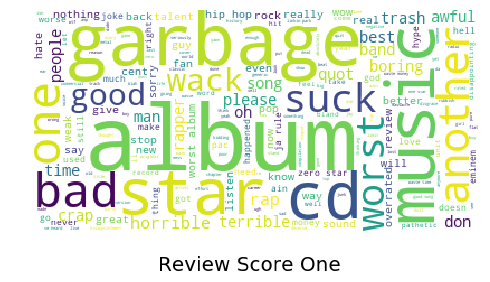

In [53]:
show_wordcloud(cluster1["summaryClean"][0], title = "Review Score One")

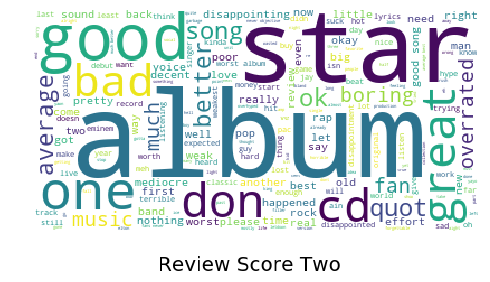

In [54]:
show_wordcloud(cluster1["summaryClean"][1] , title = "Review Score Two")

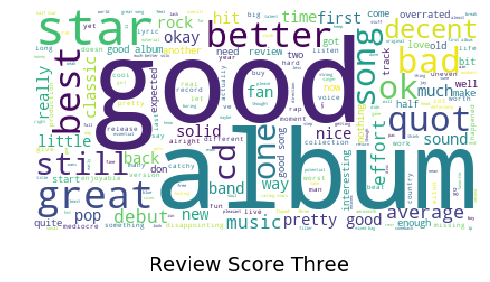

In [55]:
show_wordcloud(cluster1["summaryClean"][2], title = "Review Score Three")

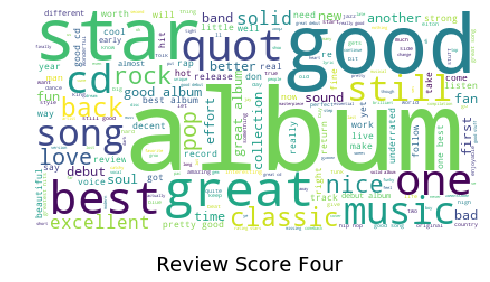

In [56]:
show_wordcloud(cluster1["summaryClean"][3], title = "Review Score Four")


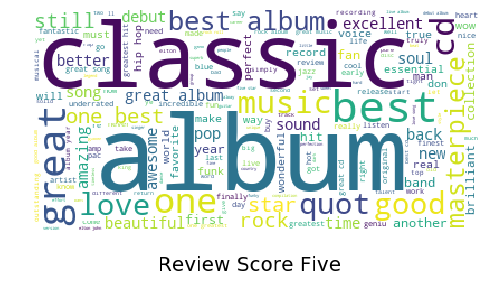

In [58]:
show_wordcloud(cluster1["summaryClean"][4], title = "Review Score Five")